In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
figsize = (15, 5)
%matplotlib inline

In [10]:
bikes = pd.read_csv('/home/stayal0ne/Downloads/pandas-cookbook/data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True,
                    index_col='Date')

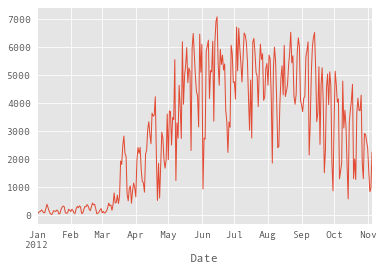

In [15]:
bikes['Berri 1'].plot()

In [19]:
#creating the dataframe with just the Berri bikepath in it
berri_bikes = bikes[['Berri 1']]

In [20]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [21]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [22]:
#day of the month for each raw
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

In [30]:
#only weekdays
berri_bikes.index.weekday
#0 is Monday and so on

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [32]:
berri_bikes['weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

/home/stayal0ne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


In [35]:
#Group the raws by weekday and add up all the values with the same weekday
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [36]:
#replace the indexes with weekdays
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


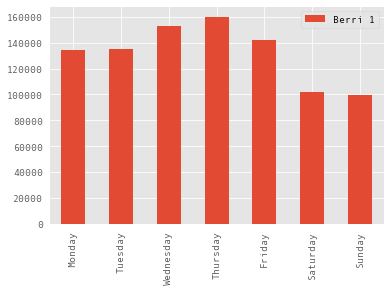

In [37]:
weekday_counts.plot(kind='bar')

/home/stayal0ne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


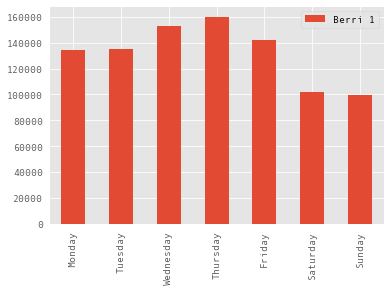

In [38]:
#put them in one line
bikes = pd.read_csv('/home/stayal0ne/Downloads/pandas-cookbook/data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']]
berri_bikes['weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')